In [1]:
import torch
import torchvision.models as models

# Load EfficientNet_B3 with pre-trained weights
model = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.IMAGENET1K_V1)

# Set model to evaluation mode
model.eval()

print("Model Loaded Successfully!")


Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to C:\Users\User/.cache\torch\hub\checkpoints\efficientnet_b3_rwightman-b3899882.pth
100.0%


Model Loaded Successfully!


In [5]:
from PIL import Image
from torchvision import transforms

# Load image and convert to RGB (to remove alpha channel if present)
image = Image.open("dataset/sample.png").convert("RGB")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((300, 300)),  # Resize for EfficientNet_B3
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization
])

# Apply transformations
image = transform(image).unsqueeze(0)  # Add batch dimension
print("Transformed Image Shape:", image.shape)



Transformed Image Shape: torch.Size([1, 3, 300, 300])


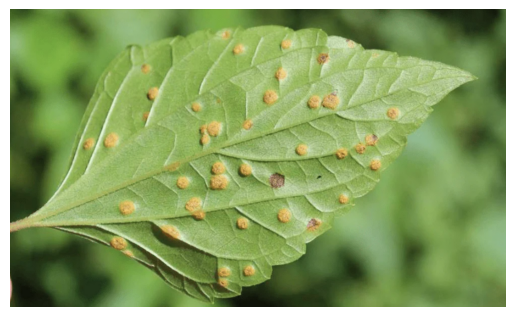

In [7]:
import matplotlib.pyplot as plt

# Load image and convert to RGB
image_path = "dataset/sample.png"
image = Image.open(image_path).convert("RGB")

# Show the image
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()


In [11]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load image and convert to RGB
image_path = "dataset/sample.png"  # Change to your actual image path
image = Image.open(image_path).convert("RGB")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((300, 300)),  
    transforms.ToTensor(),  
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  
])

# Apply transformations & add batch dimension
image = transform(image).unsqueeze(0)  

# Move model to correct device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Move image tensor to the same device
image = image.to(device, dtype=torch.float32)

# Run inference
with torch.no_grad():
    output = model(image)

print("Model Inference Output Shape:", output.shape)


Model Inference Output Shape: torch.Size([1, 1000])


In [17]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define data transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((300, 300)),  # Resize for EfficientNet_B3
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize for ImageNet
])

# Load dataset (Assuming "dataset" contains subfolders for each class)
dataset_path = "dataset"  # Update if needed
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split into train (80%) and validation (20%)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Check dataset size
print(f"Total Images: {len(full_dataset)}, Train: {train_size}, Validation: {val_size}")


Total Images: 20638, Train: 16510, Validation: 4128


In [20]:
import torch.nn as nn  # <-- ADD THIS LINE
import torch.optim as optim

# Define loss function & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to GPU if available
model = model.to(device)


In [21]:
from tqdm import tqdm  # For progress bar

# Number of epochs
epochs = 10  

for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    loop = tqdm(train_loader, leave=True)
    
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        running_loss += loss.item()
        
        # Update progress bar
        loop.set_description(f"Epoch [{epoch+1}/{epochs}]")
        loop.set_postfix(loss=running_loss / len(train_loader), accuracy=100 * correct / total)

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    print(f"Validation Loss: {val_loss / len(val_loader)}, Validation Accuracy: {100 * correct_val / total_val:.2f}%\n")


ModuleNotFoundError: No module named 'tqdm'